### Support Vector Machine - Titanic Dataset

#### Step 1: Load Dataset

In [12]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
# Load titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [14]:
# print first 5 columns
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### Step 2: Preprocessing the data

In [15]:
# Checking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# Handling missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [17]:
# Feature Engineering: Child feature 
df['Child'] = df['Age'].apply(lambda x: 1 if x<18 else 0)

In [18]:
# Encoding Categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [19]:
# Drop columns that are not need
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [20]:
# Remove outliers in the 'Fare' column (values higher that 3 standard deviations)
df = df[df['Fare'] < (df['Fare'].mean() + 3*df['Fare'].std())]

In [21]:
# Display cleaned data
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child
0,1,0,3,1,22.0,1,0,7.2500,2,0
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,2,0
3,4,1,1,0,35.0,1,0,53.1000,2,0
4,5,0,3,1,35.0,0,0,8.0500,2,0


#### Step 3: Split Data into train and test

In [22]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

#### Step 4: Scaling Features

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### Step 5: Model Building

In [25]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

#### Step 6: Evaluate the model performance

In [26]:
y_pred = svm_model.predict(X_test_scaled)

In [27]:
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.8057142857142857


- The model is good, showing decent predictive performance

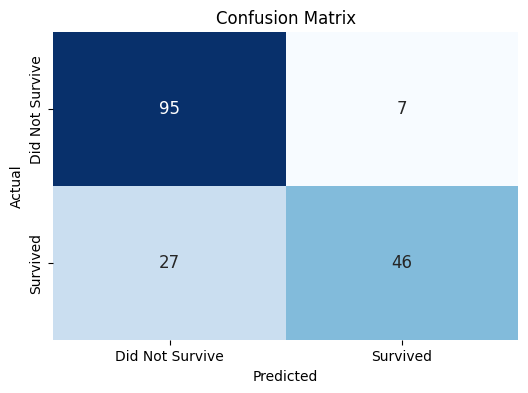

In [39]:
# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=['Did Not Survive', 'Survived'],
           yticklabels=['Did Not Survive', 'Survived'],
           annot_kws = {"size":12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()